In [10]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


For this project, I will be using the fastf1 library, which is built on top of Pandas DataFrames and Series but includes convenient methods for working specifically with Formula 1 data. The goal of this project is to analyze the race session of the 2024 Australian Grand Prix, where Ferrari achieved a 1-2 finish with Carlos Sainz as the winner (proud moment for a Ferrari fan!).

The first step is to load the data for this session. After loading the data, we will proceed with data cleaning. This involves removing laps affected by pit stops and laps that are not accurate due to yellow flags, virtual safety cars, safety cars, or red flags.


In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Singapore Grand Prix', 'FP2')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']


In [5]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:19:25.862000,VER,1,0 days 00:01:33.832000,2.0,1.0,NaT,NaT,0 days 00:00:27.730000,0 days 00:00:39.568000,...,True,Red Bull Racing,0 days 00:17:52.030000,2024-09-20 13:03:09.799,1,NaN,False,,False,True
3,0 days 00:23:47.650000,VER,1,0 days 00:01:33.324000,4.0,1.0,NaT,NaT,0 days 00:00:27.653000,0 days 00:00:39.422000,...,True,Red Bull Racing,0 days 00:22:14.326000,2024-09-20 13:07:32.095,1,NaN,False,,False,True
4,0 days 00:26:15.206000,VER,1,0 days 00:02:27.556000,5.0,1.0,NaT,NaT,0 days 00:00:46.223000,0 days 00:01:03.041000,...,True,Red Bull Racing,0 days 00:23:47.650000,2024-09-20 13:09:05.419,1,NaN,False,,False,True
7,0 days 00:41:22.242000,VER,1,0 days 00:01:32.021000,8.0,2.0,NaT,NaT,0 days 00:00:27.240000,0 days 00:00:38.642000,...,True,Red Bull Racing,0 days 00:39:50.221000,2024-09-20 13:25:07.990,1,NaN,False,,False,True
9,0 days 00:45:44.508000,VER,1,0 days 00:01:32.312000,10.0,2.0,NaT,NaT,0 days 00:00:27.381000,0 days 00:00:38.801000,...,True,Red Bull Racing,0 days 00:44:12.196000,2024-09-20 13:29:29.965,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0 days 01:11:17.203000,PIA,81,0 days 00:01:37.622000,22.0,6.0,NaT,NaT,0 days 00:00:28.900000,0 days 00:00:41.592000,...,False,McLaren,0 days 01:09:39.581000,2024-09-20 13:54:57.350,12,NaN,False,,False,True
516,0 days 01:12:59.064000,PIA,81,0 days 00:01:41.861000,23.0,6.0,NaT,NaT,0 days 00:00:28.949000,0 days 00:00:41.325000,...,False,McLaren,0 days 01:11:17.203000,2024-09-20 13:56:34.972,12,NaN,False,,False,True
517,0 days 01:14:40.827000,PIA,81,0 days 00:01:41.763000,24.0,6.0,NaT,NaT,0 days 00:00:28.994000,0 days 00:00:45.313000,...,False,McLaren,0 days 01:12:59.064000,2024-09-20 13:58:16.833,2,NaN,False,,False,True
518,0 days 01:16:23.942000,PIA,81,0 days 00:01:43.115000,25.0,6.0,NaT,NaT,0 days 00:00:29.271000,0 days 00:00:45.738000,...,False,McLaren,0 days 01:14:40.827000,2024-09-20 13:59:58.596,2,NaN,False,,False,True


In [11]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [12]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [13]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}


In [14]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


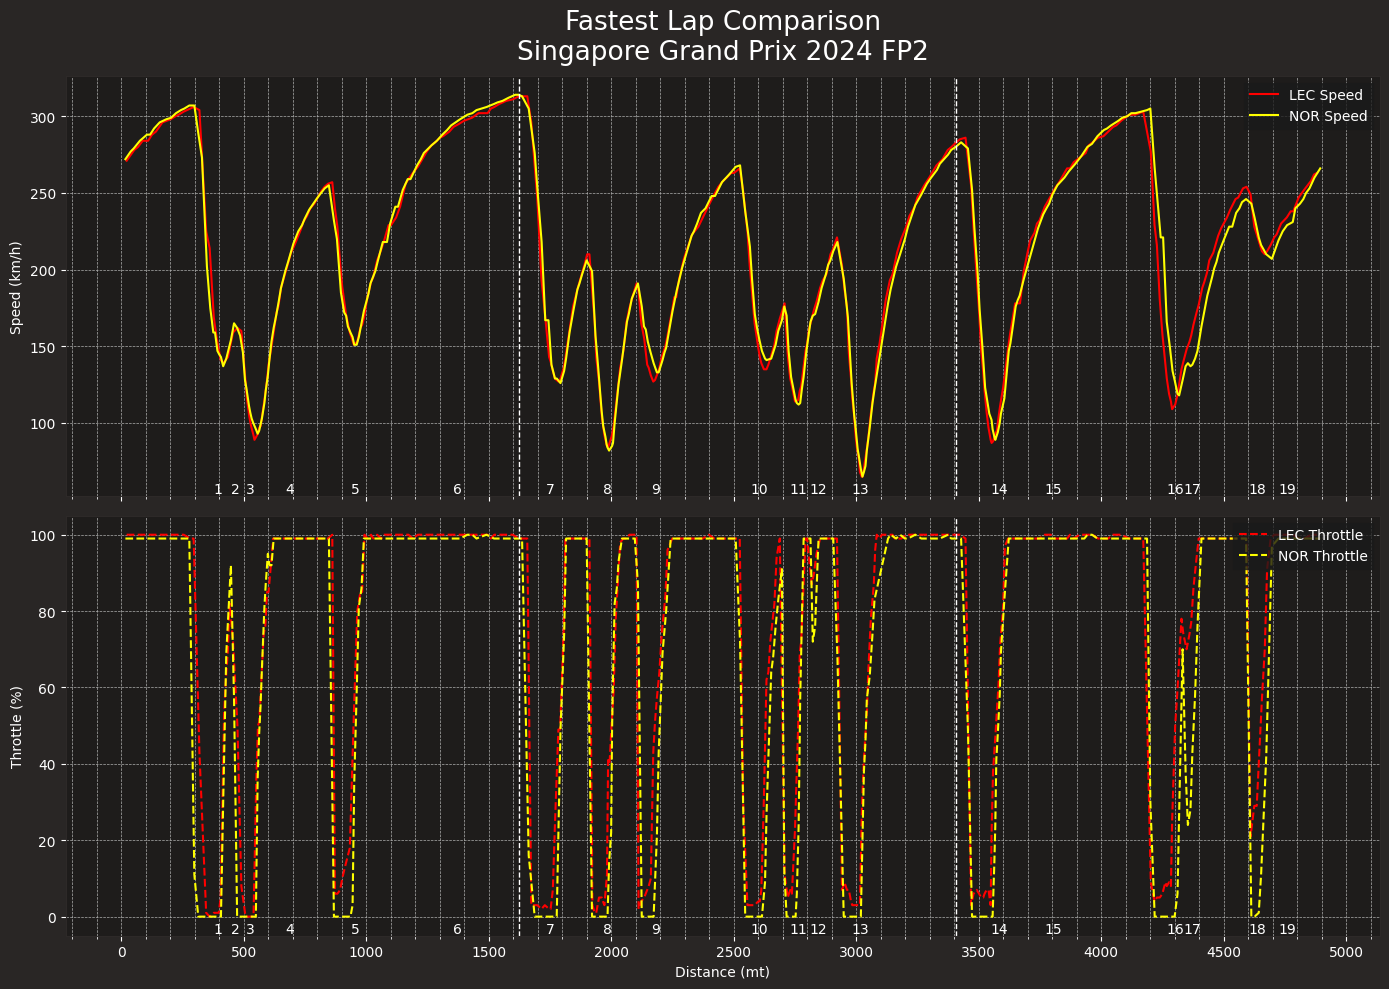

In [15]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_driver('LEC').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_driver('SAI').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_driver('NOR').pick_fastest()


# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()

# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='yellow', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} FP2", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='yellow', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers in

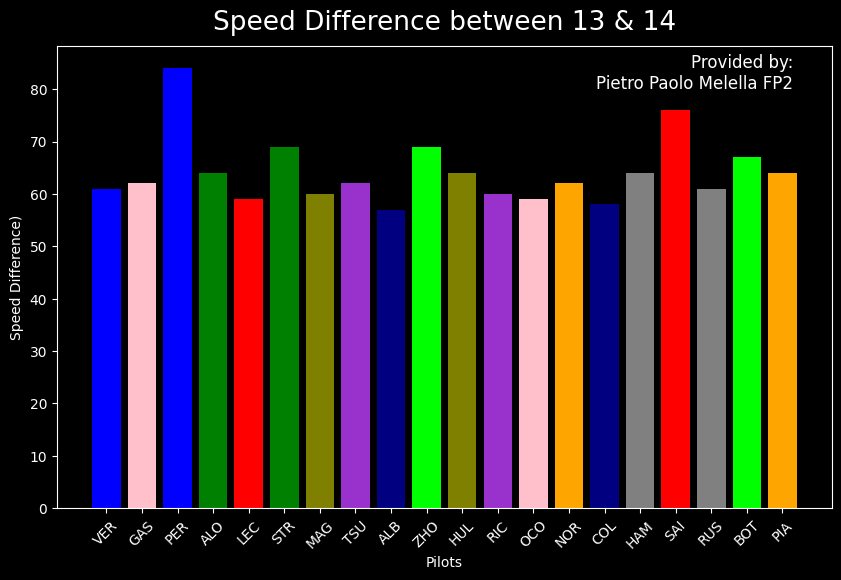

<Figure size 640x480 with 0 Axes>

In [16]:
speed_diff_t13_14= {}

for pilot in drivers:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]
    #selecting the data from the begging of sector to the last max speed with drs closed
    #computing the different 
    speed_diff_t13_14[pilot] = pilot_car_data_13_14 ['Speed'].max() - pilot_car_data_13_14 ['Speed'].iloc[0]



# Extract the pilots and speeds
pilots = list(speed_diff_t13_14.keys())
speeds = list(speed_diff_t13_14.values())
pilot_colors = [colors.get(pilot, 'black') for pilot in pilots]  # Default to black if color not found

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(pilots, speeds, color=pilot_colors)

# Add labels and title
plt.xlabel('Pilots')
plt.ylabel('Speed Difference)')
plt.title('Speed Difference between 13 & 14')

# Rotate pilot labels for better readability
plt.xticks(rotation=45)

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella FP2',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Show the plot
plt.show()

# Show plot
plt.tight_layout()
plt.show()

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


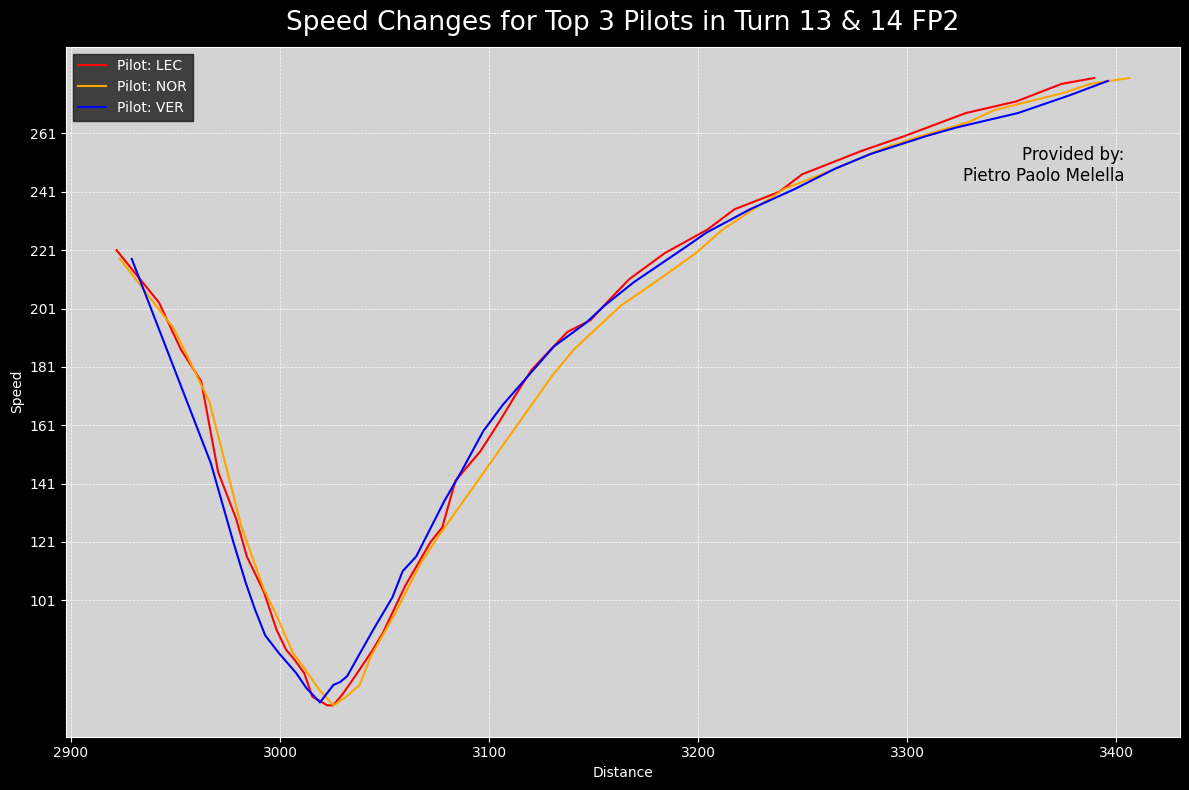

In [17]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

drivers_4 =['LEC', 'NOR', 'VER']

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 3 Pilots in Turn 13 & 14 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_13_14['Speed'].max(), 100)) + 1, int(max(pilot_car_data_13_14['Speed'].max(), 100)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/var/folders/3p/f1ks__ss09vf2m4_z_cm1ry40000gp/T/ipykernel_6196/1153301781.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_car_data_13_14['Acceleration'] = ((pilot_car_data_13_14['Speed'].diff().fillna(0))/pilot_car_data_13_14['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)
/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. U

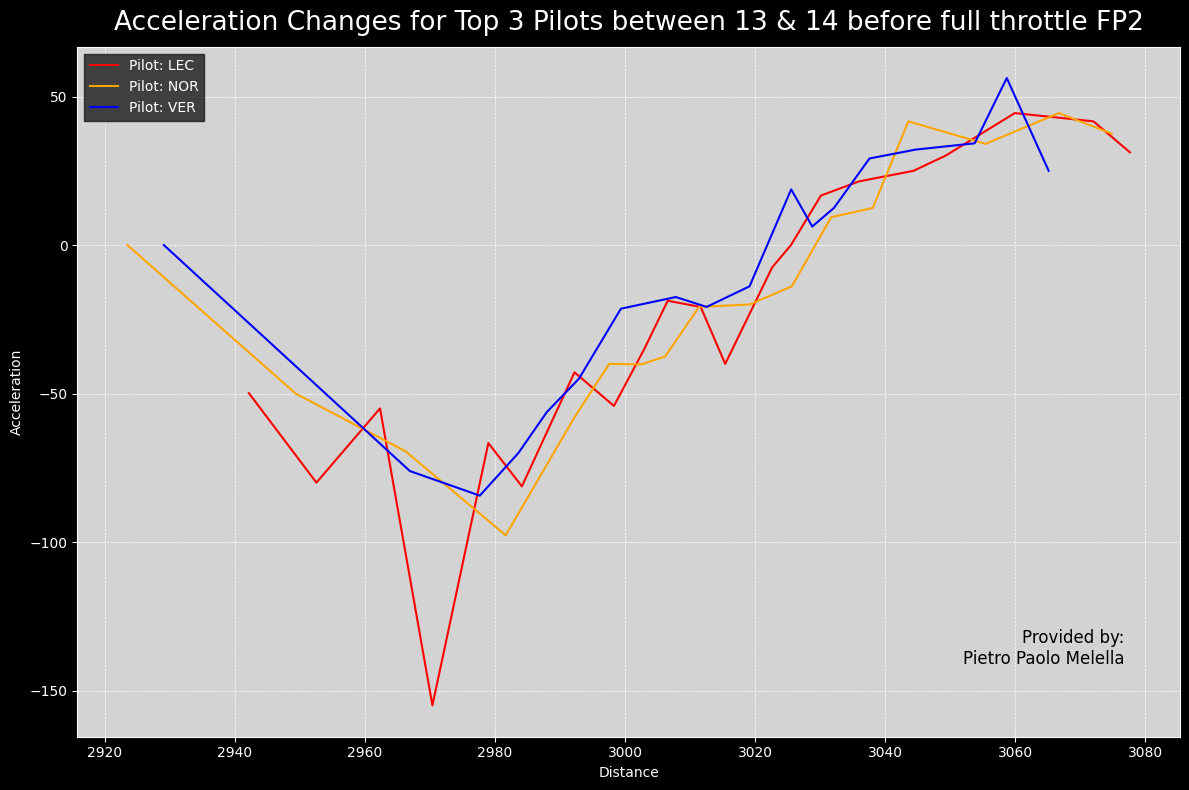

In [18]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')
# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]

    pilot_car_data_13_14['Acceleration'] = ((pilot_car_data_13_14['Speed'].diff().fillna(0))/pilot_car_data_13_14['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)

    pilot_car_data_t13_14_throttle_99 = pilot_car_data_13_14[pilot_car_data_13_14['Throttle']<99].reset_index()



    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t13_14_throttle_99['Distance'], pilot_car_data_t13_14_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")


# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots between 13 & 14 before full throttle FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


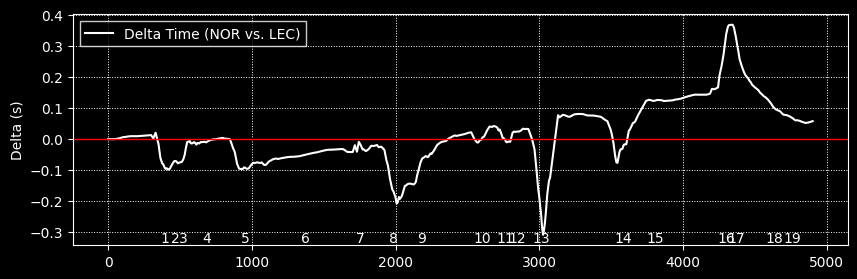

In [19]:
# Assuming `delta_time`, `ref_tel`, and `compare_tel` are already calculated
# If you haven't calculated delta_time, ref_tel, and compare_tel:
delta_time, ref_tel, compare_tel = utils.delta_time(NOR_FASTEST_LAP, LEC_FASTEST_LAP)

# Extract 'Distance' from the corners DataFrame
corner_distances = circuit_info.corners['Distance']

# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Sequential corner numbers

# Create the plot
plt.figure(figsize=(10, 3))  # Wide figure for the delta plot
ax1 = plt.gca()

# Plot the delta time between the two laps
ax1.plot(ref_tel['Distance'], delta_time, color='white', label='Delta Time (NOR vs. LEC)')  # White line for delta

# Add a red horizontal line at y=0
ax1.axhline(0, color='red', linewidth=1)

# Customize the plot background and grid
ax1.set_facecolor('black')  # Black background
ax1.grid(True, color='white', linestyle=':', linewidth=0.7)  # Dotted white grid

# Annotate the plot with corner numbers
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, 
             verticalalignment='bottom', horizontalalignment='center')

# Customize the y-axis label and ticks
ax1.set_ylabel('Delta (s)', color='white')

# Set the color of the axis ticks and labels to white
ax1.tick_params(axis='both', colors='white')

# Customize the spines (axes lines)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')

# Add a legend to explain the plot elements
ax1.legend(loc='upper left', facecolor='black', edgecolor='white', fontsize=10, labelcolor='white')

# Show the plot
plt.show()

In [20]:
#to fix

#import torch

def delta_time_pytorch(reference_lap, compare_lap):
    """
    Calculate the delta time between two laps using PyTorch for interpolation and computation.
    
    Args:
        reference_lap (pd.Series): The lap taken as reference
        compare_lap (pd.Series): The lap to compare
    
    Returns:
        tuple: (delta, reference, comparison)
          - torch.Tensor with the delta in seconds.
          - Dictionary for the reference lap telemetry
          - Dictionary for the comparison lap telemetry
    """

    # Extract telemetry and convert to PyTorch tensors
    ref = reference_lap.get_car_data(interpolate_edges=True).add_distance()
    comp = compare_lap.get_car_data(interpolate_edges=True).add_distance()

    ref_distance = torch.tensor(ref['Distance'].to_numpy(), dtype=torch.float32)
    ref_time = torch.tensor(ref['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    comp_distance = torch.tensor(comp['Distance'].to_numpy(), dtype=torch.float32)
    comp_time = torch.tensor(comp['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    # Interpolation function using PyTorch
    def linear_interpolate(x, xp, fp):
        # Clamping values to avoid extrapolation
        x = torch.clamp(x, xp.min(), xp.max())
        
        indices = torch.searchsorted(xp, x, right=True) - 1
        indices = torch.clamp(indices, 0, len(xp) - 2)

        x0 = xp[indices]
        x1 = xp[indices + 1]
        y0 = fp[indices]
        y1 = fp[indices + 1]
        
        # Linear interpolation formula
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (x - x0)

    # Perform linear interpolation for lap time along the reference lap distance
    lap_time_interpolated = linear_interpolate(ref_distance, comp_distance, comp_time)

    # Calculate the delta between interpolated comparison lap and reference lap
    delta = lap_time_interpolated - ref_time

    return delta, ref, comp


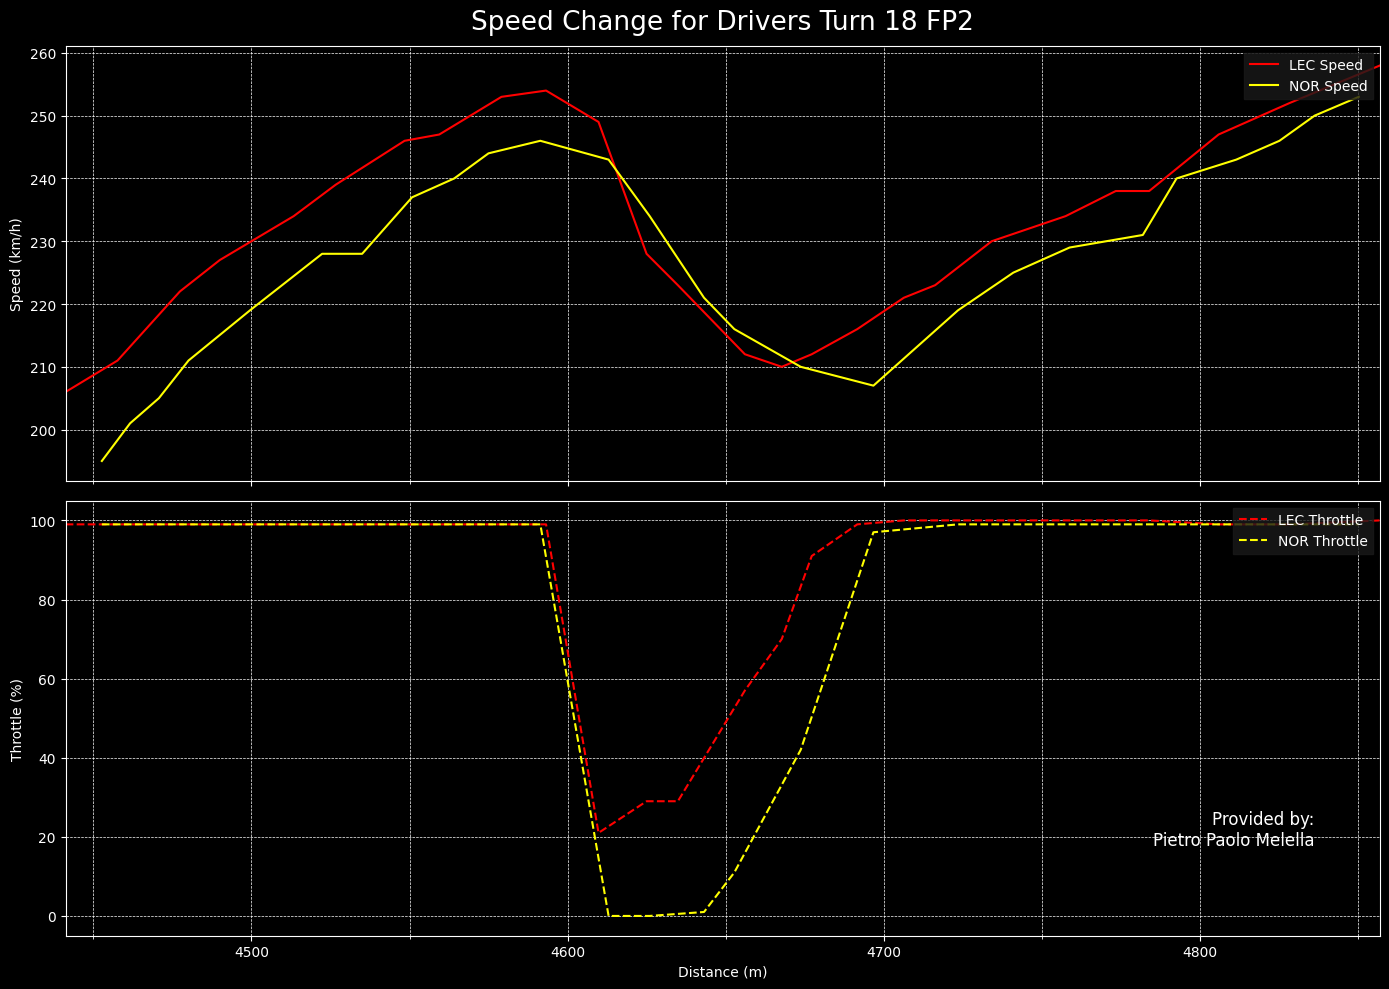

In [21]:
LEC_tel_turn18 = LEC_tel[(LEC_tel['Distance'] > (corner_distances[17] - 200)) & (LEC_tel['Distance'] < (corner_distances[18] + 100))]

NOR_tel_turn18 = NOR_tel[(NOR_tel['Distance'] > (corner_distances[17] - 200)) & (NOR_tel['Distance'] < (corner_distances[18] + 100))]

# Define the minimum and maximum distance values from LEC_tel_turn18 to set the x-axis limits
min_distance = LEC_tel_turn18['Distance'].min()
max_distance = LEC_tel_turn18['Distance'].max()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel_turn18['Distance'], LEC_tel_turn18['Speed'], color='red', label='LEC Speed')
ax1.plot(NOR_tel_turn18['Distance'], NOR_tel_turn18['Speed'], color='yellow', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title('Speed Change for Drivers Turn 18 FP2', color='white')

# Set x-axis limits based on the LEC_tel_turn18['Distance'] range
ax1.set_xlim([min_distance, max_distance])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust this as needed for better scaling
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))

# Plot Throttle on the second subplot
ax2.plot(LEC_tel_turn18['Distance'], LEC_tel_turn18['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(NOR_tel_turn18['Distance'], NOR_tel_turn18['Throttle'], color='yellow', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (m)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')

# Set x-axis limits based on the LEC_tel_turn18['Distance'] range
ax2.set_xlim([min_distance, max_distance])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust this as needed for better scaling
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(50))

# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

plt.text(
    0.95, 0.2, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
# With thus code, i filter all the lap time by a median, with a trashhold. Maybe it could change for different track
race_pace = transformed_laps[(transformed_laps['LapTime (s)'] > (transformed_laps['LapTime (s)'].median() - 2)) & (transformed_laps['LapTime (s)'] < (transformed_laps['LapTime (s)'].median() + 2.5))]

In [24]:
#The goal here is try to take the clean lap times, and for this reason we use the median, it's mostly likely the pilot will do clean laps and some bad laps(traffic and so on)

# Group by 'Driver' and apply the filter for each driver's LapTime
race_pace_filtered = []

# Iterate through each driver in the grouped dataframe
for driver, data in race_pace.groupby('Driver'):
    # Calculate median for LapTime (s) for each driver
    median_lap_time = data['LapTime (s)'].median()

    # Apply the filter for LapTime within the specified range
    filtered_driver_data = data[(data['LapTime (s)'] > (median_lap_time - 1.5)) &
                                (data['LapTime (s)'] < (median_lap_time + 1.5))]

    # Append the filtered data to the list
    race_pace_filtered.append(filtered_driver_data)

# Combine all filtered dataframes into one
race_pace_filtered_df = pd.concat(race_pace_filtered)

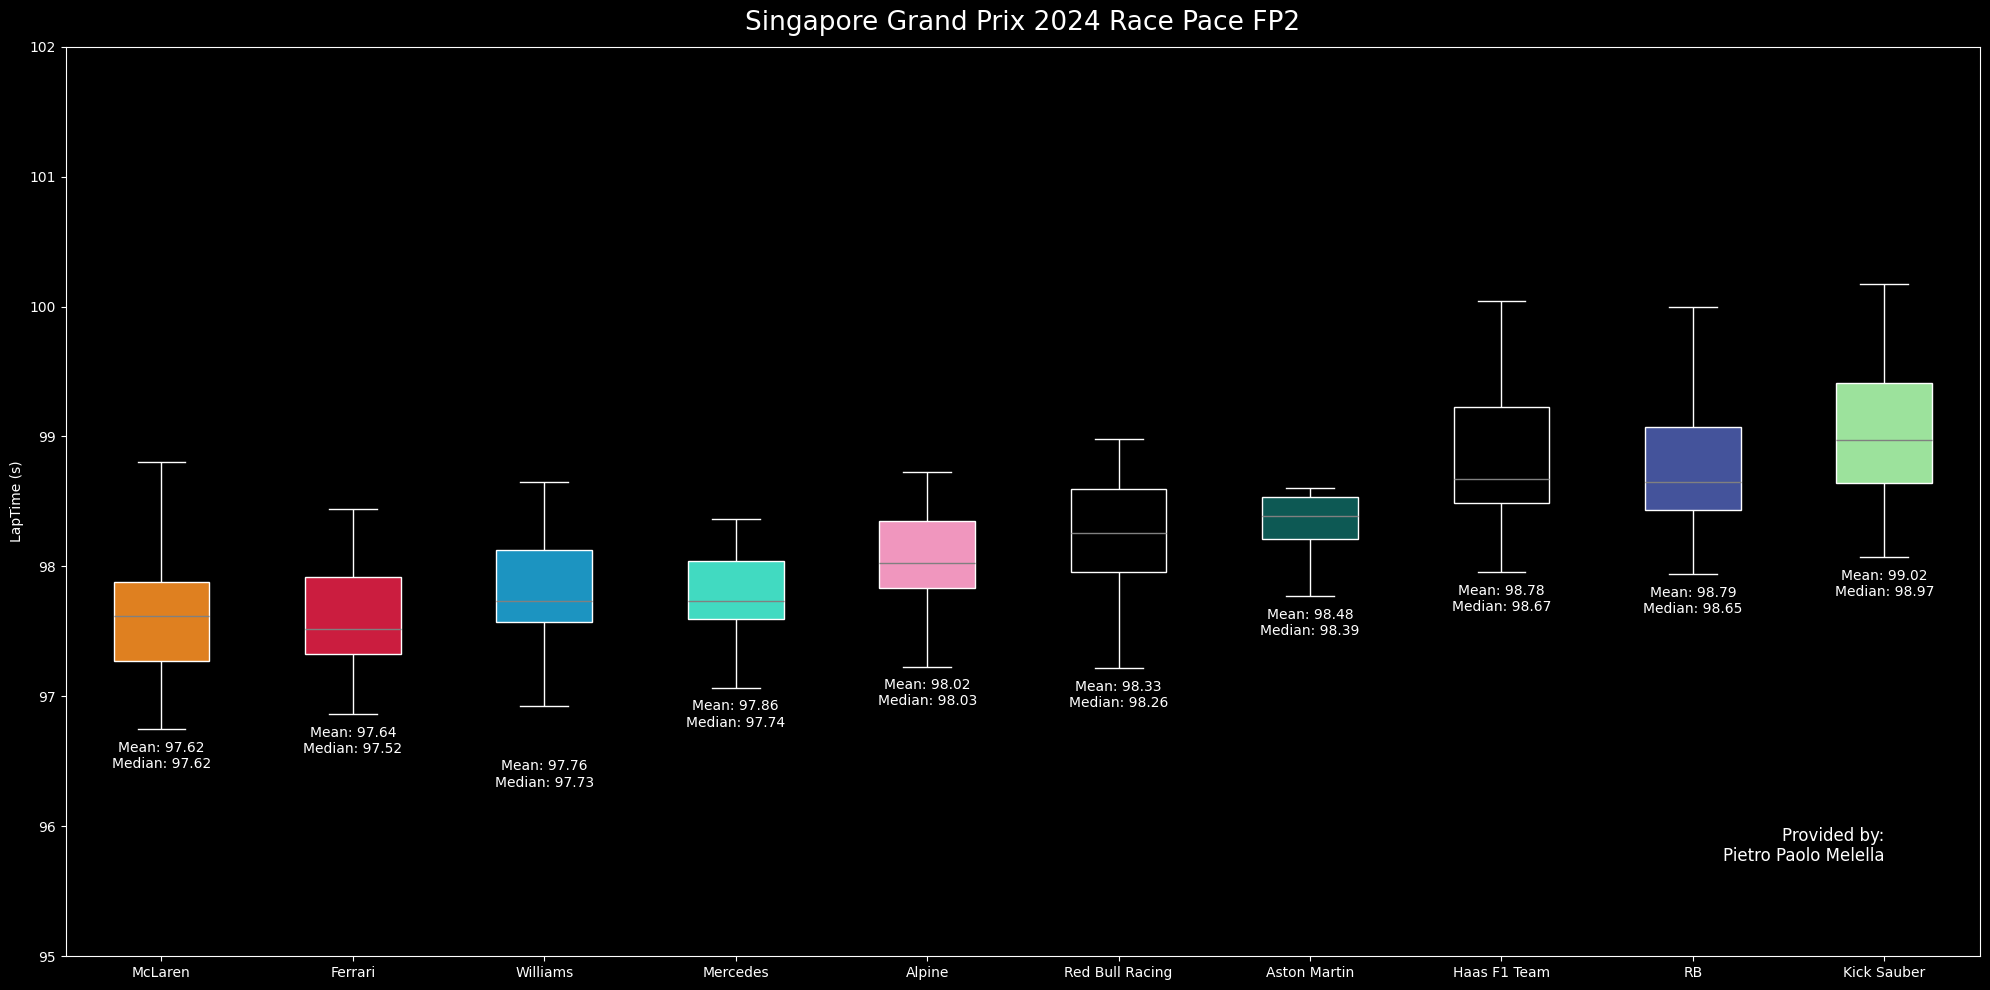

In [30]:
# First, calculate the mean and median times for each team
race_pace_filtered_df.reset_index(drop=True, inplace=True)

team_stats = race_pace_filtered_df.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
box_plot = sns.boxplot(
    data=race_pace_filtered_df,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker
    
    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']
    
    # Place the text below the whisker (min value in this case)
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}', 
        horizontalalignment='center', color='white', fontsize=10
    )

# Add the title and grid properties
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace FP2")
plt.grid(visible=False)

# Add credit text
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Remove the x-label
ax.set(xlabel=None)
# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(95, 102)  # Example range, adjust based on your data

plt.tight_layout()
plt.show()

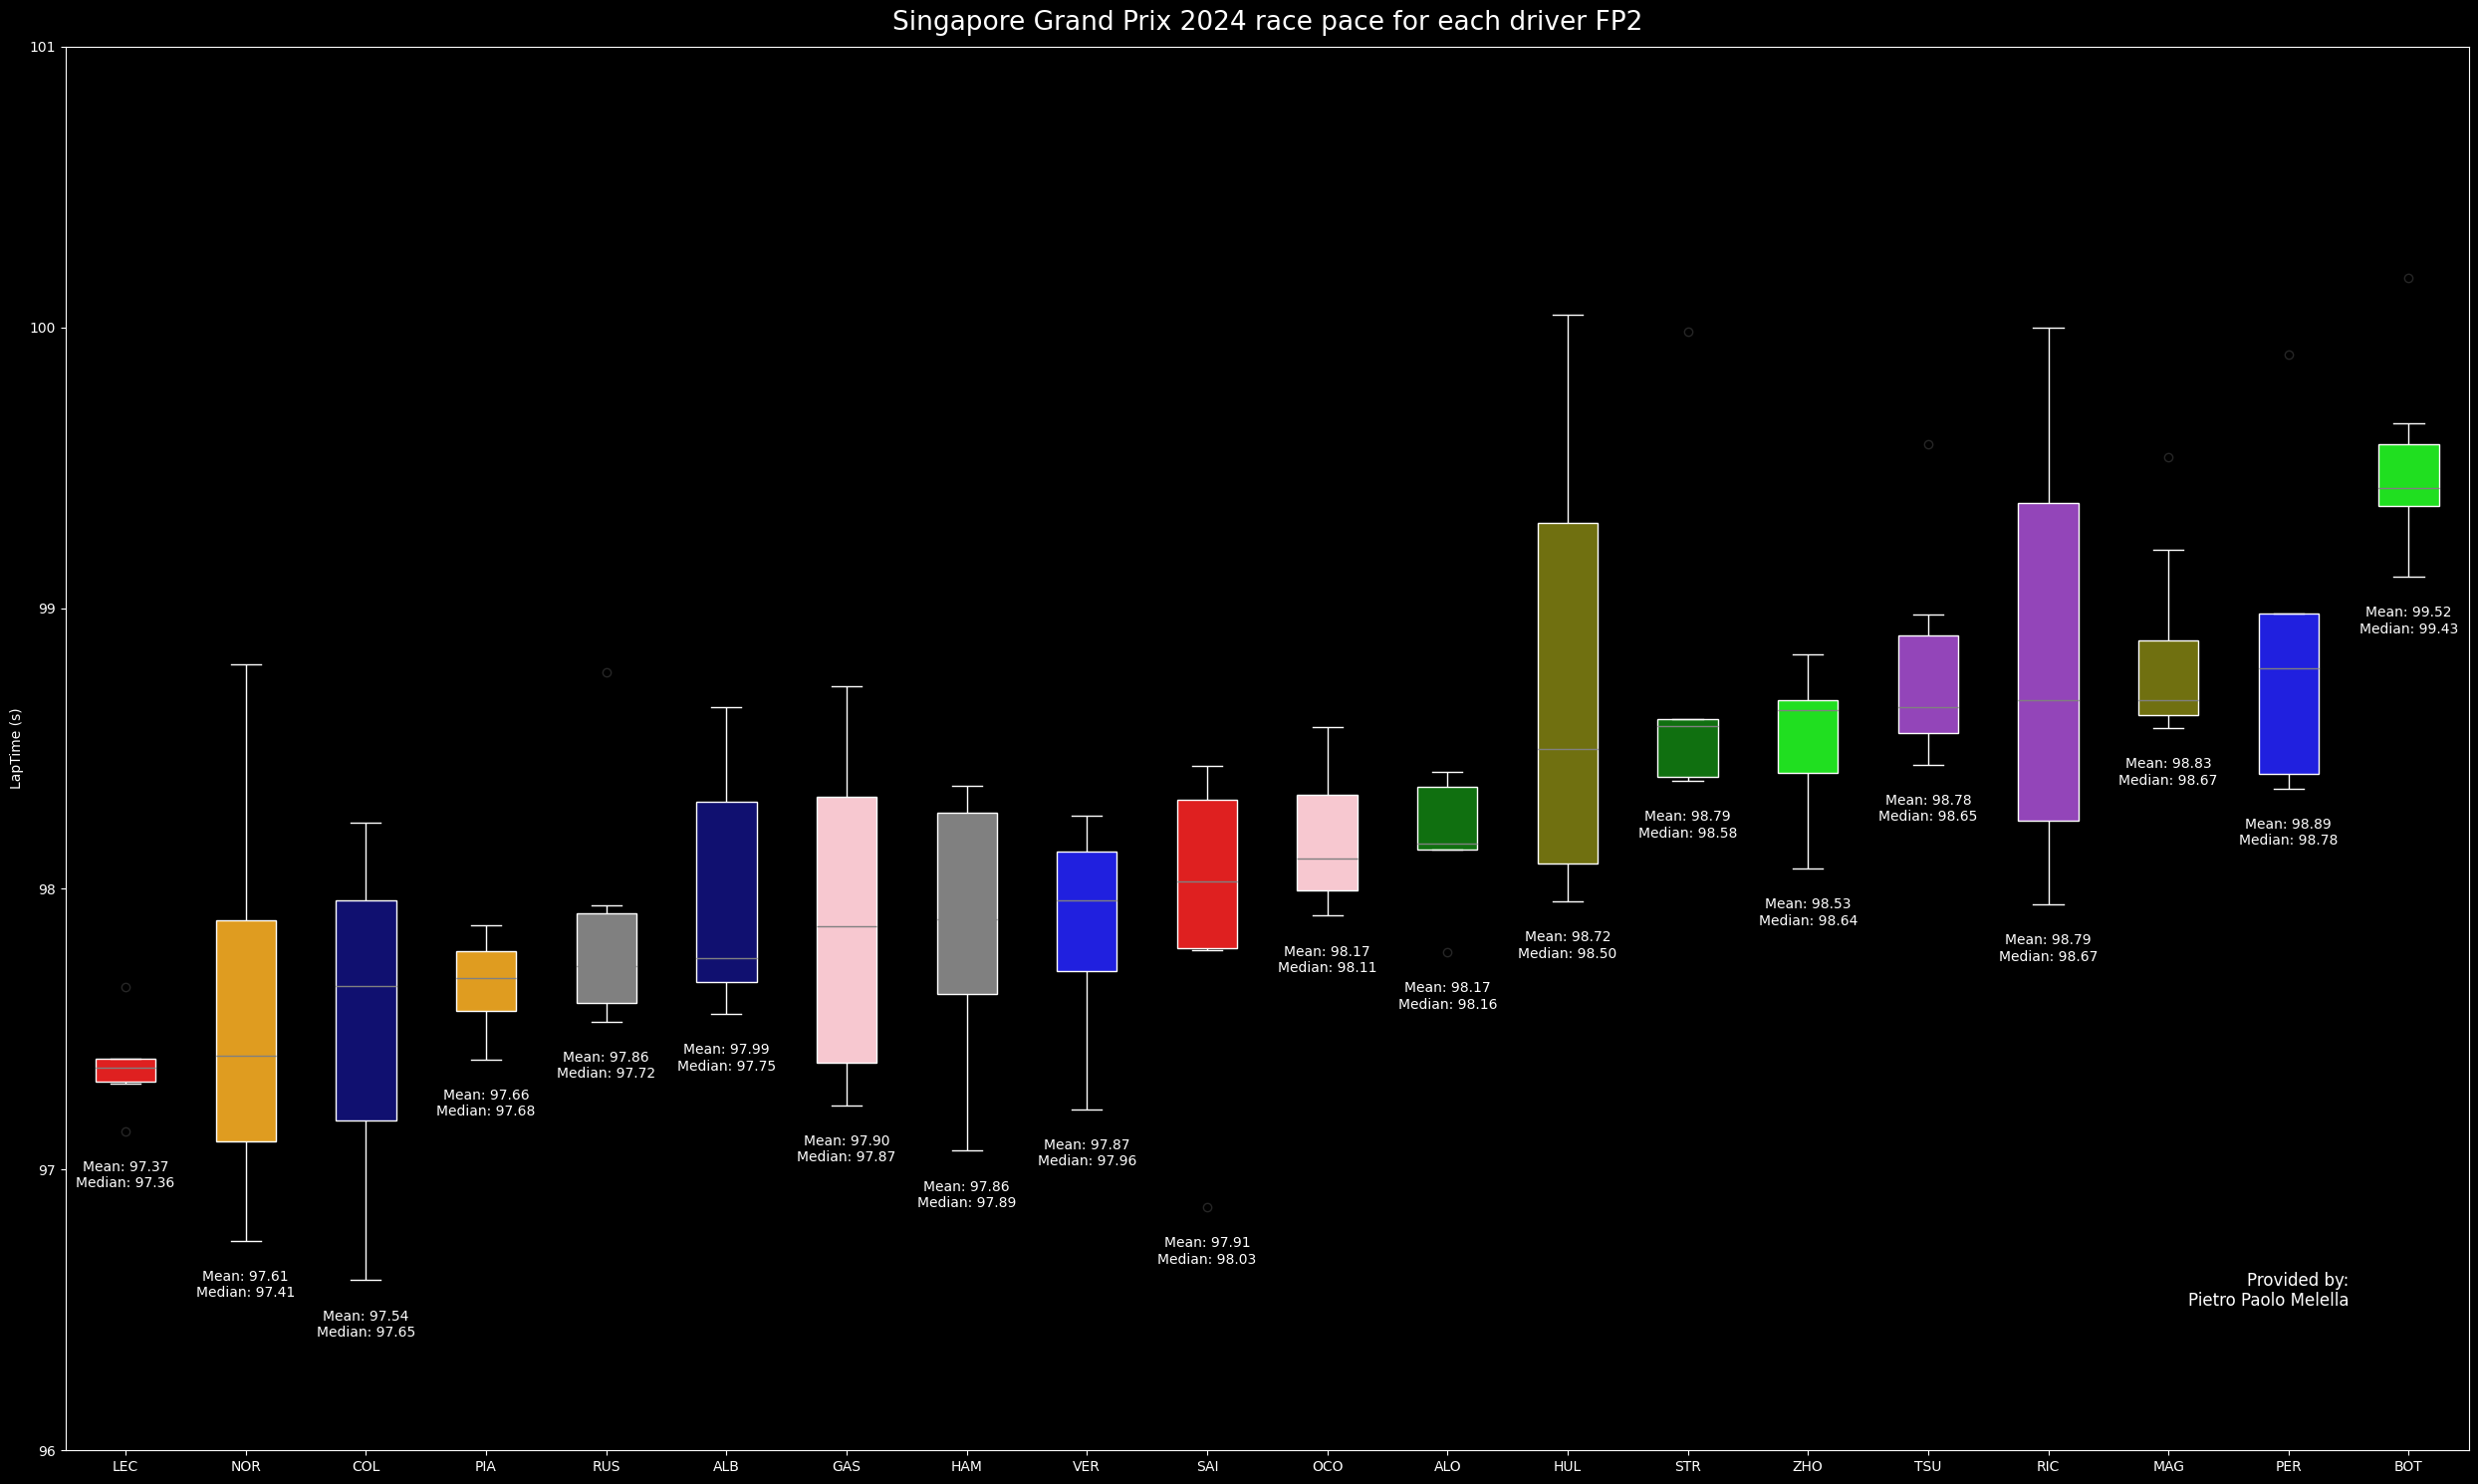

In [37]:
drivers_stats = race_pace_filtered_df.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=race_pace_filtered_df,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)

# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.2,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

plt.title(f"{session.event['EventName']} {session.event.year} race pace for each driver FP2")
plt.grid(visible=False)

plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# x-label is redundant
ax.set(xlabel=None)
ax.set_ylim(96,101)
plt.tight_layout()
plt.show()

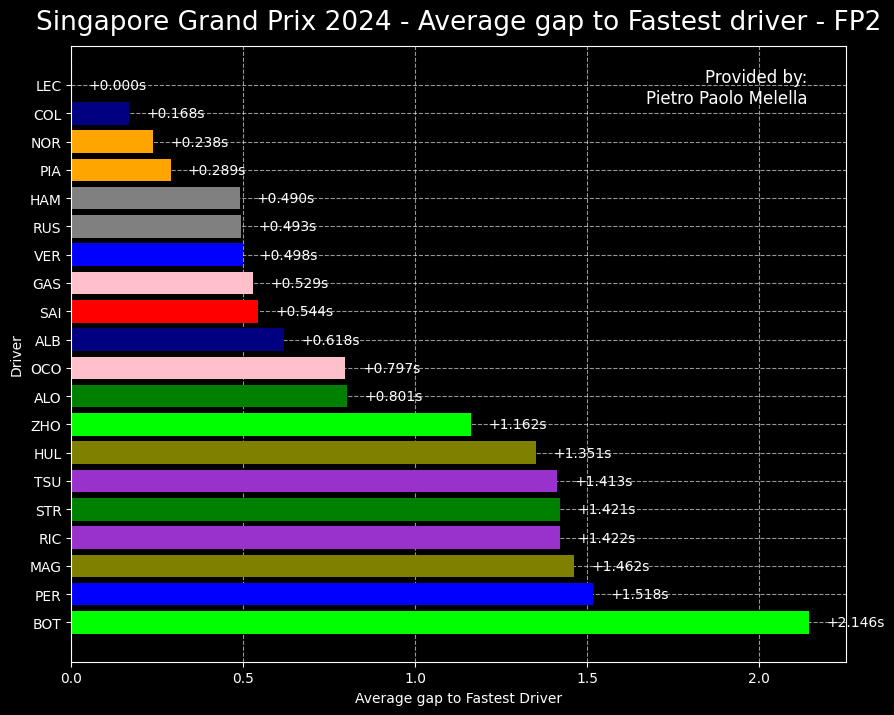

In [38]:
mean_lap_times = race_pace_filtered_df.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver - FP2")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s', 
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()